In [ ]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


/workspaces/js-complexity-model/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv(override=True)
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

dataset = load_dataset("aslam-naseer/js-function-complexity-processed")

Token has not been saved to git credential helper.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.


In [3]:
BASE_MODEL = "Qwen/Qwen3-4B-Instruct-2507"
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

token_counts = []
for ds in dataset.values():
    for item in ds:
        tokens = tokenizer(item['code'], truncation=True, max_length=2048)
        token_counts.append(len(tokens['input_ids']))

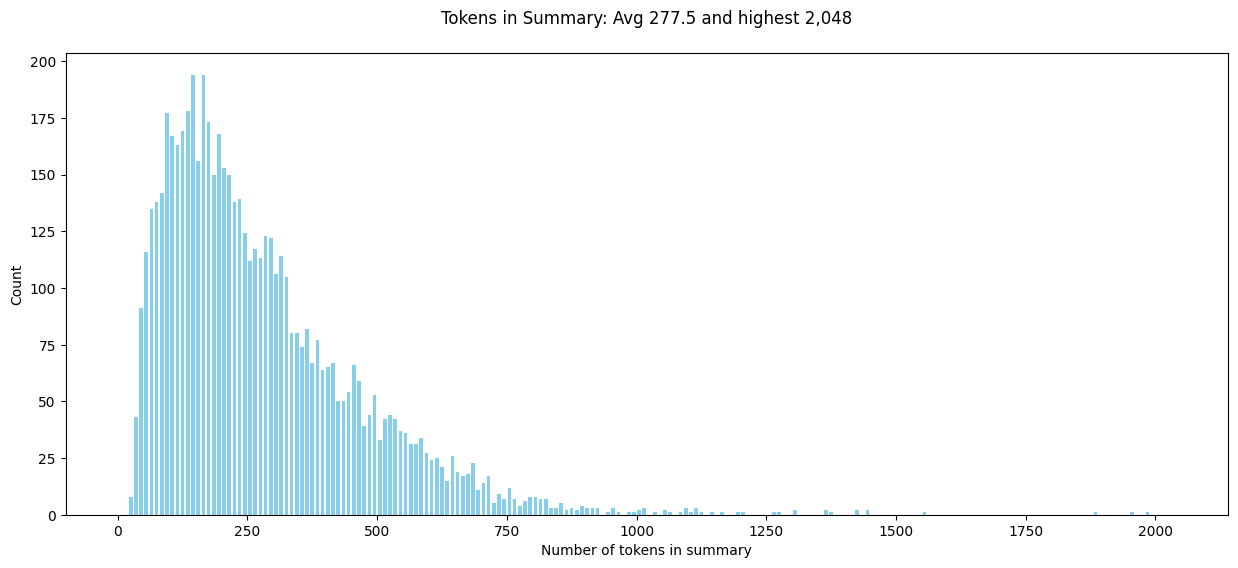

In [4]:
plt.figure(figsize=(15, 6))
plt.title(f"Tokens in Summary: Avg {sum(token_counts)/len(token_counts):,.1f} and highest {max(token_counts):,}\n")
plt.xlabel('Number of tokens in summary')
plt.ylabel('Count')
plt.hist(token_counts, rwidth=0.7, color="skyblue", bins=range(0, max(token_counts) + 1, 10))
plt.show()

In [7]:
def get_prompt(example):
  analysis = (
    f"Analysis:\n"
      f"- Parameters: {example['parameter_count']}\n"
      f"- Nesting Depth: {example['max_nesting_depth']}\n"
      f"- Variables: {example['variable_count']}"
  )

  messages = [
        {
            "role": "system",
            "content": "You are a static analysis expert. Analyze the code metrics and calculate the cyclomatic complexity."
        },
        {
            "role": "user",
            "content": f"```javascript\n{example['code']}\n```"
        },
        {
            "role": "assistant",
            "content": f"{analysis}\n\nComplexity Score: {example['complexity']:.1f}"
        }
    ]
    
  return {"messages": messages}

prompt_dataset = dataset.map(get_prompt, remove_columns=dataset["train"].column_names)

Map: 100%|██████████| 500/500 [00:00<00:00, 11487.91 examples/s]


In [ ]:
# prompt_dataset.push_to_hub("aslam-naseer/js-function-complexity-messages")

Creating parquet from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 46.22ba/s]
Processing Files (1 / 1): 100%|██████████| 2.64MB / 2.64MB,  0.00B/s  
New Data Upload: |          |  0.00B /  0.00B,  0.00B/s  
Creating parquet from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 437.91ba/s]
Processing Files (1 / 1): 100%|██████████|  269kB /  269kB,  0.00B/s  
New Data Upload: |          |  0.00B /  0.00B,  0.00B/s  
Creating parquet from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 373.92ba/s]
Processing Files (1 / 1): 100%|██████████|  274kB /  274kB,  0.00B/s  
New Data Upload: |          |  0.00B /  0.00B,  0.00B/s  
Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.34s/ shards]
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/datasets/aslam-naseer/js-function-complexity-prompts/commit/87bc6d8da07d57436ed4d1e600cc8ba67e20b217', commit_message='Upload dataset', commit_description='', oid='87bc6d8da07d57436ed4d1e600cc8ba67e20b217', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/aslam-naseer/js-function-complexity-prompts', endpoint='https://huggingface.co', repo_type='dataset', repo_id='aslam-naseer/js-function-complexity-prompts'), pr_revision=None, pr_num=None)